In [1]:
import pandas 
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
data = pandas.read_csv("household_power_consumption.txt", sep = ";")
data.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Transform object into more suitable features

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
tmp_df = pandas.DataFrame.copy(data) # To experiment without reloading data
tmp_df = tmp_df.convert_objects(convert_numeric=True) # Change dtype

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [5]:
tmp_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
tmp_df.dtypes # Looks good 

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [7]:
# Sanity check, nothing must change on sub_metering
tmp_df.describe() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
data.isna().any() # Doesn't detect Nan on april 

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
dtype: bool

In [9]:
# Verify function
pandas.to_datetime(tmp_df["Date"], infer_datetime_format=True).head()
pandas.to_datetime(tmp_df["Time"], format="%H:%M:%S").head()

0   1900-01-01 17:24:00
1   1900-01-01 17:25:00
2   1900-01-01 17:26:00
3   1900-01-01 17:27:00
4   1900-01-01 17:28:00
Name: Time, dtype: datetime64[ns]

# Modify dtypes on data

In [10]:
data = data.convert_objects(convert_numeric=True)
data["Date"] = pandas.to_datetime(data["Date"], infer_datetime_format=True)
data["Time"] = pandas.to_datetime(data["Time"], format="%H:%M:%S") # bad year - TODO : Mix both column into one

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [11]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
data.isna().any() # detects Nan on april 

Date                     False
Time                     False
Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
dtype: bool

In [13]:
data.dtypes

Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [14]:
data["active_consumption"] = data["Global_active_power"] * 100 / 60 - data["Sub_metering_1"] \
                            - data["Sub_metering_2"]\
                            - data["Sub_metering_3"]
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,-10.973333
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,-8.066667
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,-10.043333
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,-9.020000
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,-11.890000


# Data Set Information:

Abstract: Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.





This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). 

Notes: 

* 1.$(global\_active\_power*1000/60 - sub\_metering_1 - sub\_metering_2 - sub\_metering_3)$ represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. 
* 2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


# Attribute Information:

* 1.date: Date in format dd/mm/yyyy 
* 2.time: time in format hh:mm:ss 
* 3.global_active_power: household global minute-averaged active power (in kilowatt) 
* 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
* 5.voltage: minute-averaged voltage (in volt) 
* 6.global_intensity: household global minute-averaged current intensity (in ampere) 
* 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
* 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
* 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.



Active vs reactive ?

https://www.allaboutcircuits.com/textbook/alternating-current/chpt-11/true-reactive-and-apparent-power/
https://circuitglobe.com/what-is-active-reactive-and-apparent-power.html

# Analyze and experiment on data

In [15]:
 # Do we have all informations
print(data.shape)
print(data[:1]["Date"])
print(data[-1:]["Date"])

(2075259, 10)
0   2006-12-16
Name: Date, dtype: datetime64[ns]
2075258   2010-11-26
Name: Date, dtype: datetime64[ns]


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
active_consumption       float64
dtypes: datetime64[ns](2), float64(8)
memory usage: 158.3 MB


In [17]:
data[191000:].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
191000,2007-04-28,1900-01-01 08:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191001,2007-04-28,1900-01-01 08:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191002,2007-04-28,1900-01-01 08:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191003,2007-04-28,1900-01-01 08:47:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191004,2007-04-28,1900-01-01 08:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Retrieve NA -> Requires modification
indices_na = np.where(data['Sub_metering_3'].isna())[0]
len(indices_na), indices_na

(25979, array([   6839,    6840,   19724, ..., 1990187, 1990188, 2027411]))

In [19]:
# Retrieve NA on Voltage -> Requires deletion
indices_drop = np.where(data['Voltage'].isna())[0]
len(indices_drop), indices_drop

(25979, array([   6839,    6840,   19724, ..., 1990187, 1990188, 2027411]))

In [20]:
np.sum((indices_na == indices_drop)) # Same array -> Drop

25979

In [21]:
data.dtypes

Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
active_consumption              float64
dtype: object

In [22]:
data.drop(indices_na).shape[0] / tmp_df.shape[0] * 100 # drop 1.25% as expected

98.7481562542314

In [23]:
data.drop(indices_na, inplace = True)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,-10.973333
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,-8.066667
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,-10.043333
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,-9.020000
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,-11.890000


In [24]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,-7.059532e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,1.140847e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-1.198200e+02
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.512000e+01
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-6.466667e-01
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,3.866667e-01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.221667e+01


In [25]:
data.isna().any()  # Looks good

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
active_consumption       False
dtype: bool


# Vizualisation (looking for ideas)

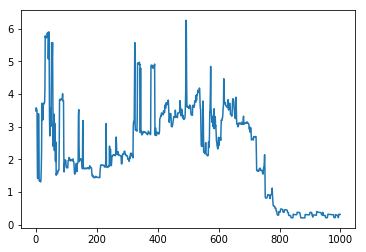

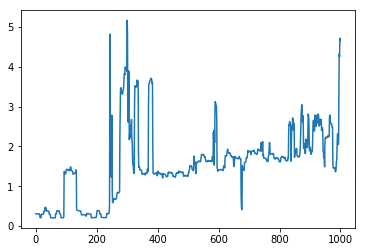

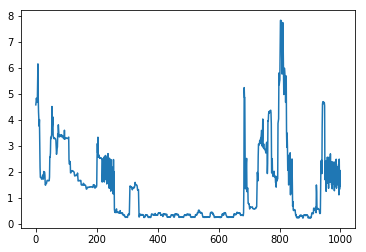

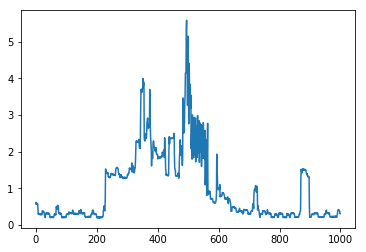

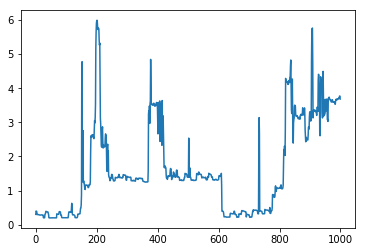

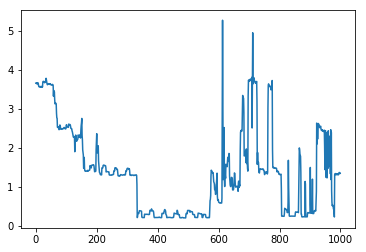

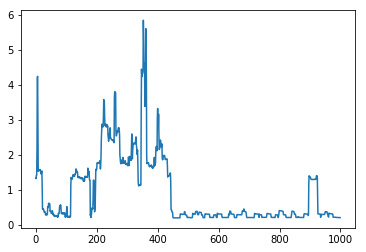

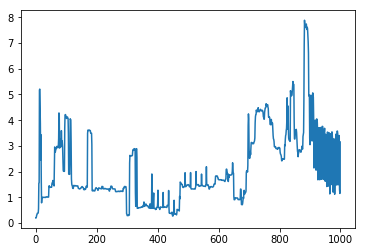

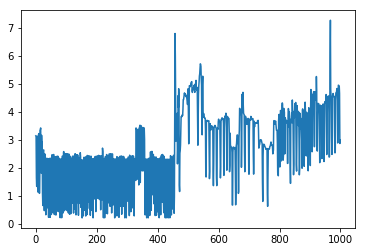

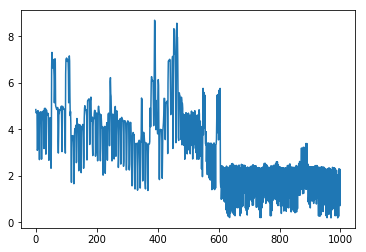

In [26]:
rang = 1000
for i in range(10):

    plt.plot(range(1000), data["Global_active_power"][rang:rang + 1000])
    rang += 1000
    plt.show()

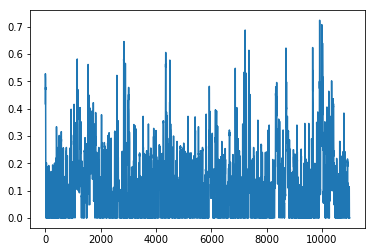

In [27]:

plt.plot(range(rang), data["Global_reactive_power"][:rang])
plt.show()

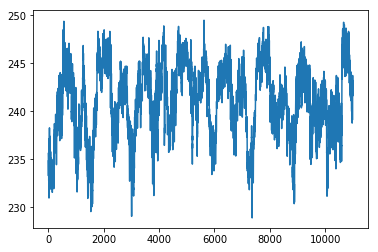

In [28]:

plt.plot(range(rang), data["Voltage"][:rang])
plt.show()

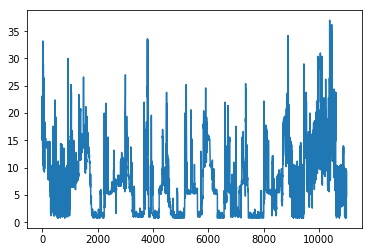

In [29]:

plt.plot(range(rang), data["Global_intensity"][:rang])
plt.show()

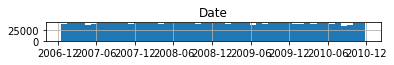

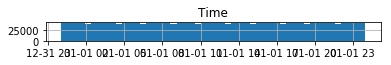

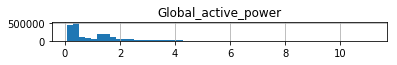

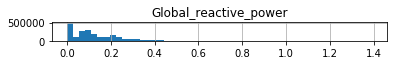

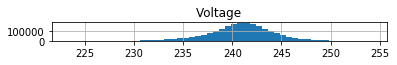

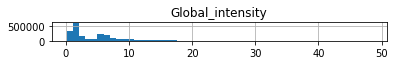

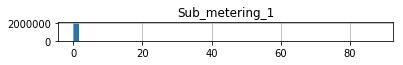

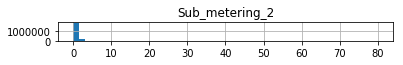

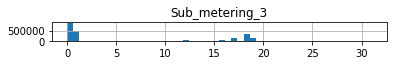

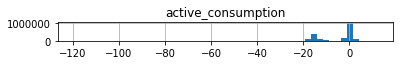

In [30]:

# Obviously date and time are useless
# Voltage wonderful gaussian
# Global variable really concentrated on low value
# Seems bimodal 
for sub, ind in enumerate(data.columns):

    plt.subplot(data.shape[1], 1, sub + 1)
#    plt.hist(data[ind], label = ind, bins = 100)
    data[ind].hist(bins = 50)
    plt.title(ind)
    plt.show()

# Problematic :  Does consumption changes per season 

### Observe data per year, to see if its interesting to investigate 

In [31]:
begin_year = 2007
start_date = pandas.to_datetime("1-1-" + str(begin_year))
end_date = pandas.to_datetime("1-1-" + str(begin_year + 1))

start_date, end_date

(Timestamp('2007-01-01 00:00:00'), Timestamp('2008-01-01 00:00:00'))

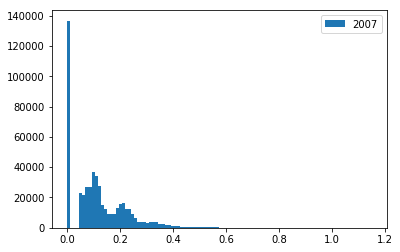

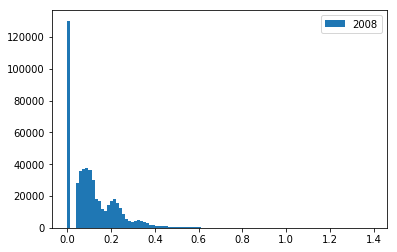

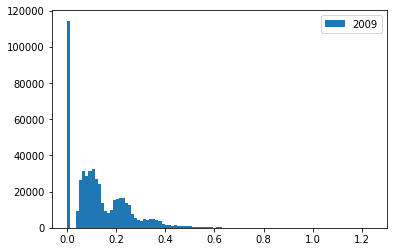

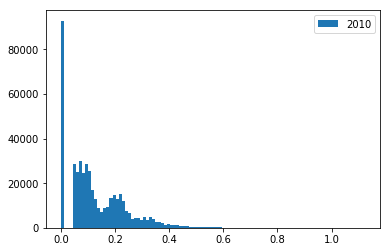

In [32]:
for year in range(2007, 2011):
    start_date = pandas.to_datetime("1-1-" + str(year))
    end_date = pandas.to_datetime("1-1-" + str(year + 1))
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_reactive_power"],  bins = 100, label = str(year))
    plt.legend()
    plt.show()

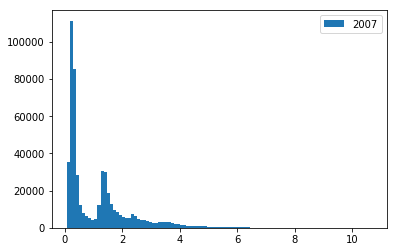

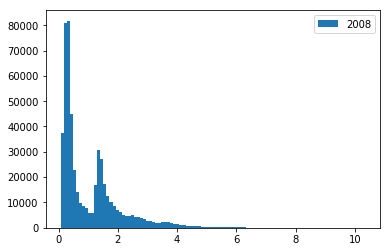

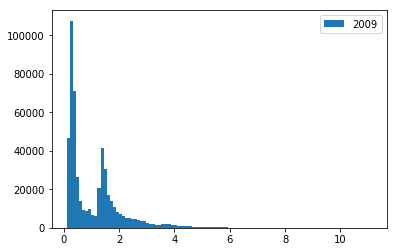

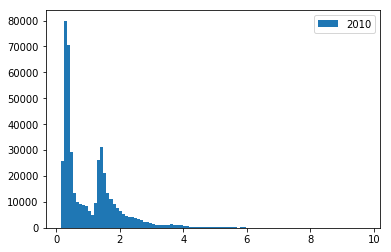

In [33]:
for year in range(2007, 2011):
    start_date = pandas.to_datetime("1-1-" + str(year))
    end_date = pandas.to_datetime("1-1-" + str(year + 1))
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_active_power"], label = str(year), bins = 100)
    plt.legend()
    plt.show()

# Per month ? 

Month :  1
Start and end  2008-01-01 00:00:00 2008-01-28 00:00:00


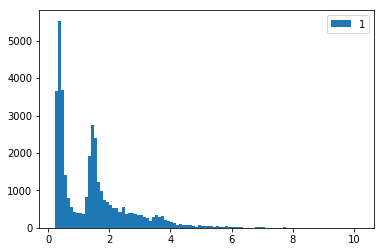

Month :  2
Start and end  2008-02-01 00:00:00 2008-02-28 00:00:00


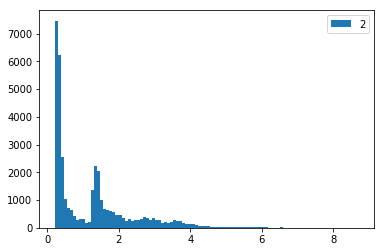

Month :  3
Start and end  2008-03-01 00:00:00 2008-03-28 00:00:00


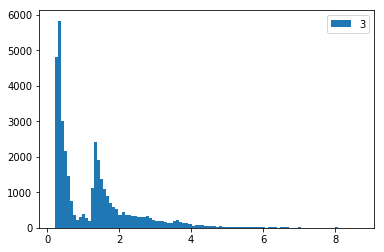

Month :  4
Start and end  2008-04-01 00:00:00 2008-04-28 00:00:00


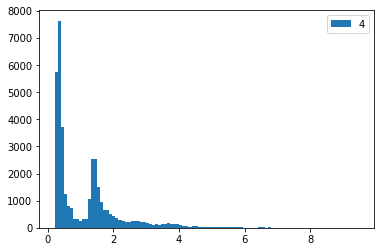

Month :  5
Start and end  2008-05-01 00:00:00 2008-05-28 00:00:00


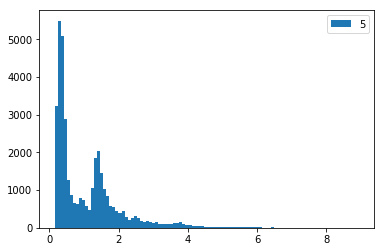

Month :  6
Start and end  2008-06-01 00:00:00 2008-06-28 00:00:00


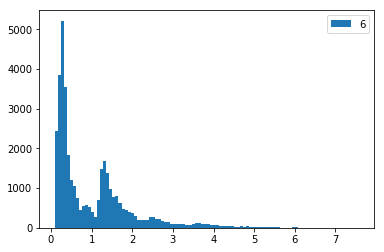

Month :  7
Start and end  2008-07-01 00:00:00 2008-07-28 00:00:00


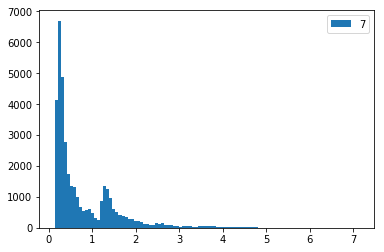

Month :  8
Start and end  2008-08-01 00:00:00 2008-08-28 00:00:00


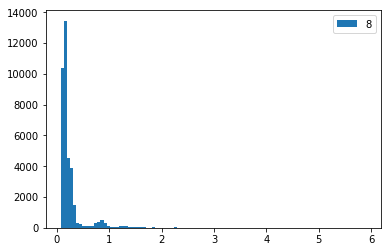

Month :  9
Start and end  2008-09-01 00:00:00 2008-09-28 00:00:00


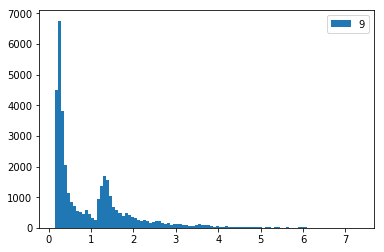

Month :  10
Start and end  2008-10-01 00:00:00 2008-10-28 00:00:00


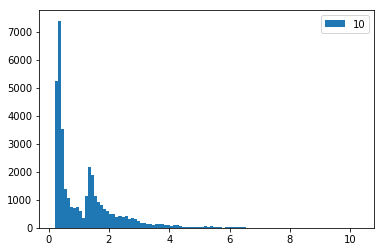

Month :  11
Start and end  2008-11-01 00:00:00 2008-11-28 00:00:00


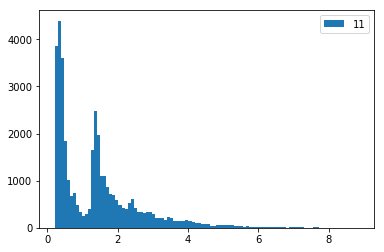

Month :  12
Start and end  2008-12-01 00:00:00 2008-12-28 00:00:00


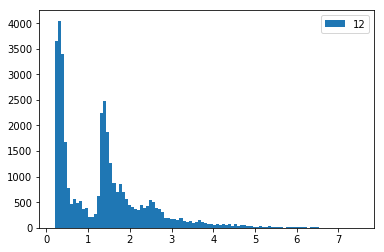

In [34]:
for month in range(1, 13):
    print("Month : ",month)
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    print("Start and end ", start_date, end_date)
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_active_power"], label = str(month), bins = 100)
    plt.legend()
    plt.show()

Month :  1
Start and end  2008-01-01 00:00:00 2008-01-28 00:00:00


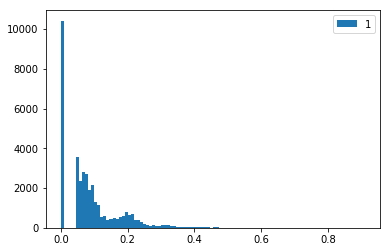

Month :  2
Start and end  2008-02-01 00:00:00 2008-02-28 00:00:00


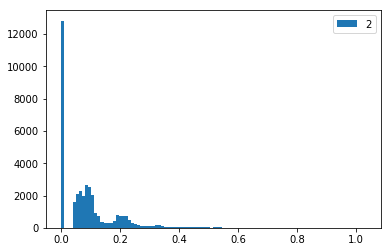

Month :  3
Start and end  2008-03-01 00:00:00 2008-03-28 00:00:00


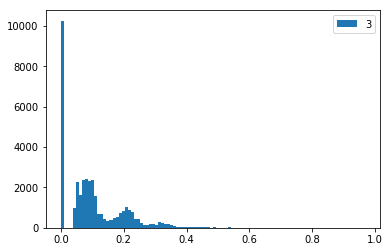

Month :  4
Start and end  2008-04-01 00:00:00 2008-04-28 00:00:00


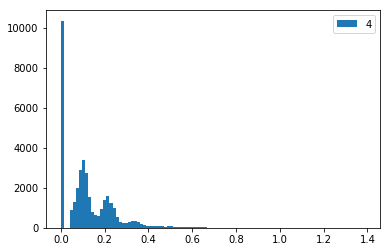

Month :  5
Start and end  2008-05-01 00:00:00 2008-05-28 00:00:00


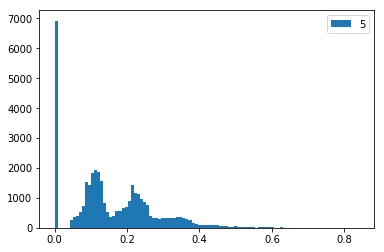

Month :  6
Start and end  2008-06-01 00:00:00 2008-06-28 00:00:00


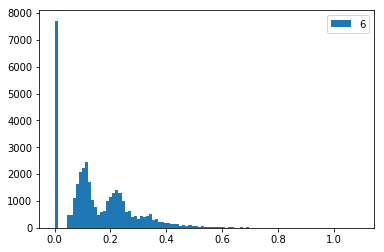

Month :  7
Start and end  2008-07-01 00:00:00 2008-07-28 00:00:00


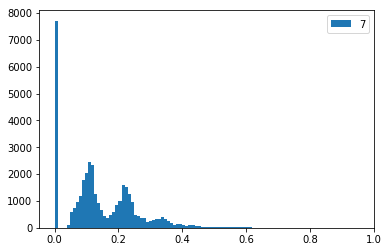

Month :  8
Start and end  2008-08-01 00:00:00 2008-08-28 00:00:00


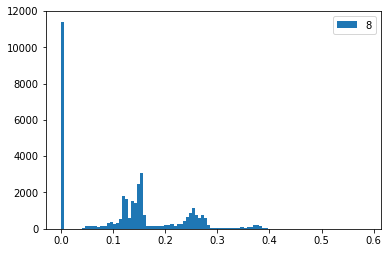

Month :  9
Start and end  2008-09-01 00:00:00 2008-09-28 00:00:00


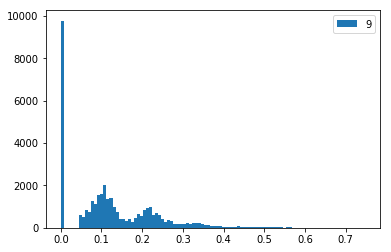

Month :  10
Start and end  2008-10-01 00:00:00 2008-10-28 00:00:00


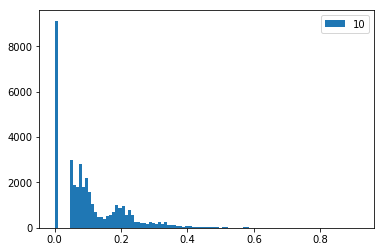

Month :  11
Start and end  2008-11-01 00:00:00 2008-11-28 00:00:00


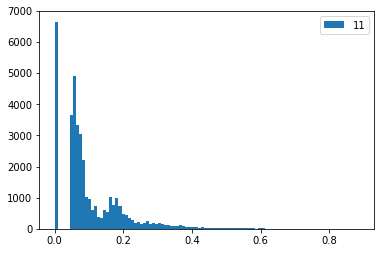

Month :  12
Start and end  2008-12-01 00:00:00 2008-12-28 00:00:00


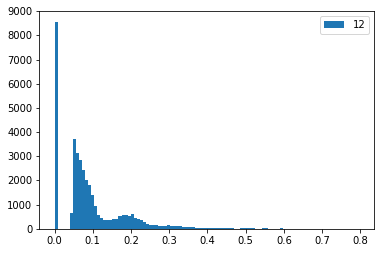

In [35]:
for month in range(1, 13):
    print("Month : ",month)
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    print("Start and end ", start_date, end_date)
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_reactive_power"], label = str(month), bins = 100)
    plt.legend()
    plt.show()

Month :  1
Start and end  2008-01-01 00:00:00 2008-01-28 00:00:00


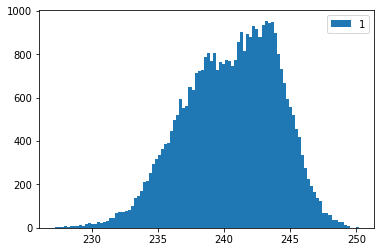

Month :  2
Start and end  2008-02-01 00:00:00 2008-02-28 00:00:00


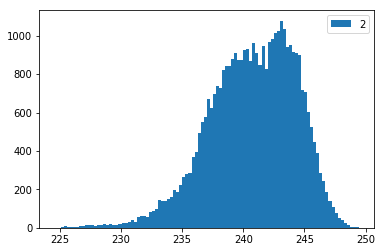

Month :  3
Start and end  2008-03-01 00:00:00 2008-03-28 00:00:00


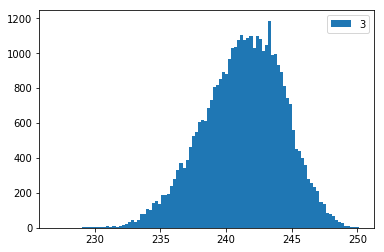

Month :  4
Start and end  2008-04-01 00:00:00 2008-04-28 00:00:00


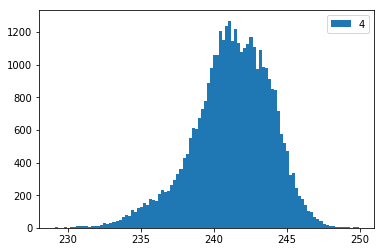

Month :  5
Start and end  2008-05-01 00:00:00 2008-05-28 00:00:00


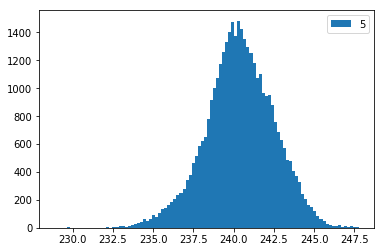

Month :  6
Start and end  2008-06-01 00:00:00 2008-06-28 00:00:00


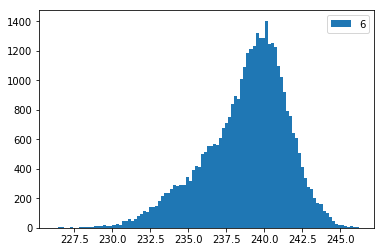

Month :  7
Start and end  2008-07-01 00:00:00 2008-07-28 00:00:00


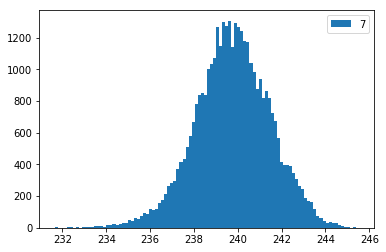

Month :  8
Start and end  2008-08-01 00:00:00 2008-08-28 00:00:00


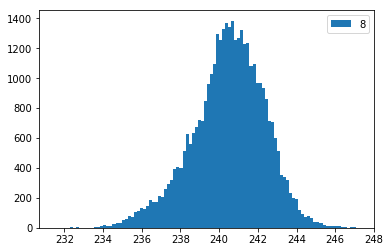

Month :  9
Start and end  2008-09-01 00:00:00 2008-09-28 00:00:00


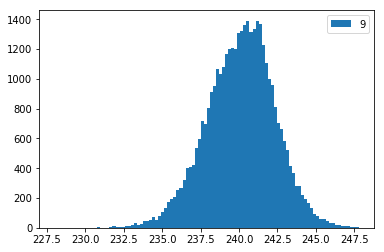

Month :  10
Start and end  2008-10-01 00:00:00 2008-10-28 00:00:00


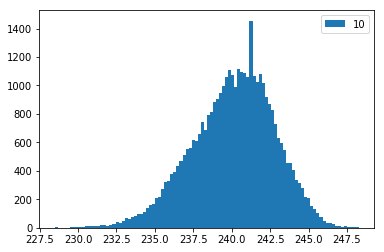

Month :  11
Start and end  2008-11-01 00:00:00 2008-11-28 00:00:00


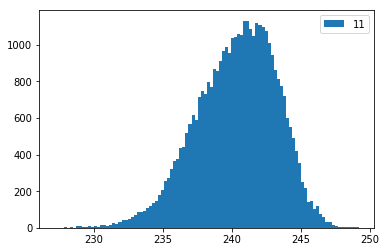

Month :  12
Start and end  2008-12-01 00:00:00 2008-12-28 00:00:00


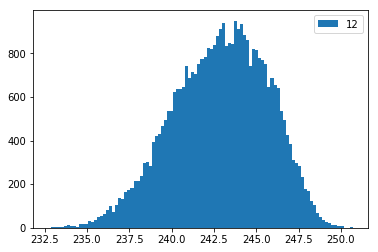

In [36]:
for month in range(1, 13):
    print("Month : ",month)
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    print("Start and end ", start_date, end_date)
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Voltage"], label = str(month), bins = 100)
    plt.legend()
    plt.show()

Month :  1
Start and end  2008-01-01 00:00:00 2008-01-28 00:00:00


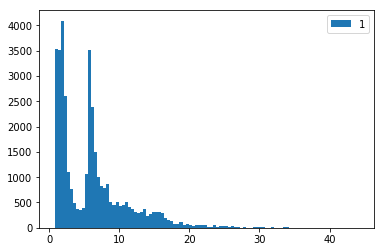

Month :  2
Start and end  2008-02-01 00:00:00 2008-02-28 00:00:00


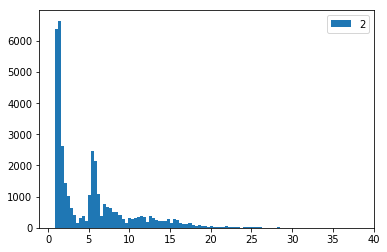

Month :  3
Start and end  2008-03-01 00:00:00 2008-03-28 00:00:00


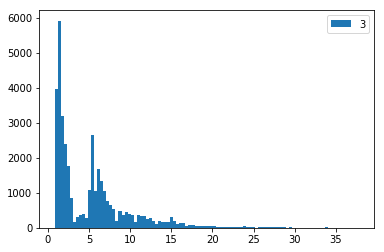

Month :  4
Start and end  2008-04-01 00:00:00 2008-04-28 00:00:00


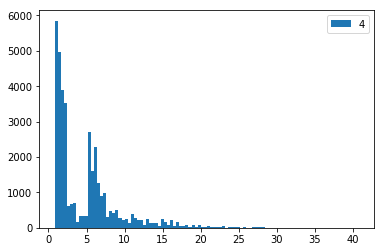

Month :  5
Start and end  2008-05-01 00:00:00 2008-05-28 00:00:00


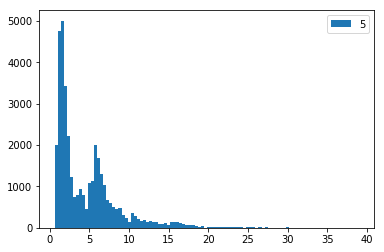

Month :  6
Start and end  2008-06-01 00:00:00 2008-06-28 00:00:00


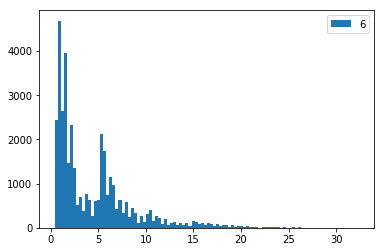

Month :  7
Start and end  2008-07-01 00:00:00 2008-07-28 00:00:00


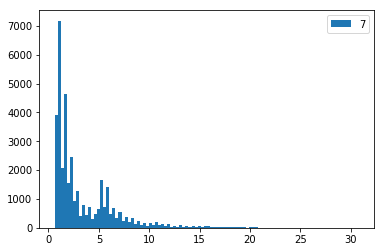

Month :  8
Start and end  2008-08-01 00:00:00 2008-08-28 00:00:00


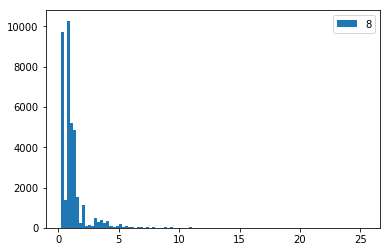

Month :  9
Start and end  2008-09-01 00:00:00 2008-09-28 00:00:00


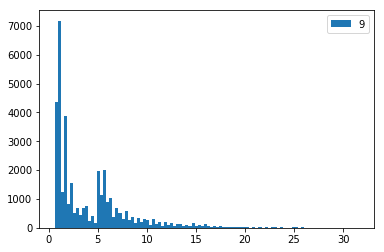

Month :  10
Start and end  2008-10-01 00:00:00 2008-10-28 00:00:00


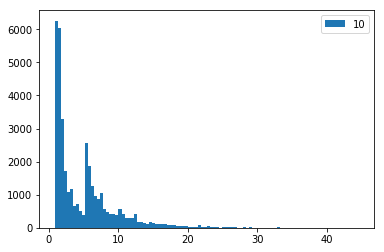

Month :  11
Start and end  2008-11-01 00:00:00 2008-11-28 00:00:00


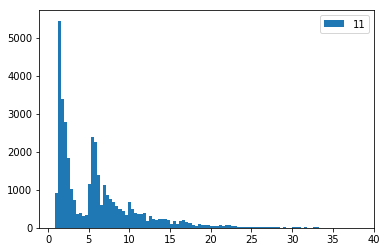

Month :  12
Start and end  2008-12-01 00:00:00 2008-12-28 00:00:00


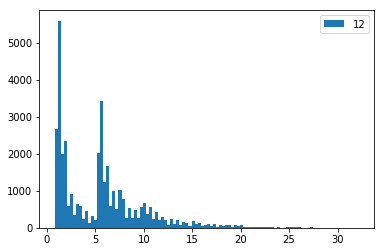

In [37]:
for month in range(1, 13):
    print("Month : ",month)
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    print("Start and end ", start_date, end_date)
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_intensity"], label = str(month), bins = 100)
    plt.legend()
    plt.show()

Month :  1
Start and end  2008-01-01 00:00:00 2008-01-28 00:00:00


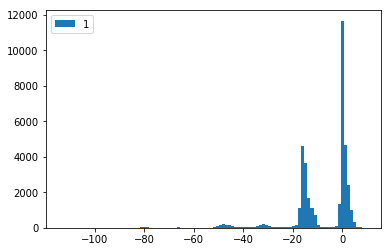

Month :  2
Start and end  2008-02-01 00:00:00 2008-02-28 00:00:00


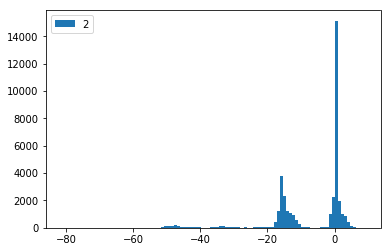

Month :  3
Start and end  2008-03-01 00:00:00 2008-03-28 00:00:00


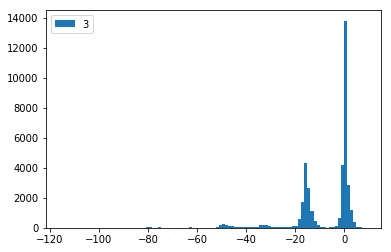

Month :  4
Start and end  2008-04-01 00:00:00 2008-04-28 00:00:00


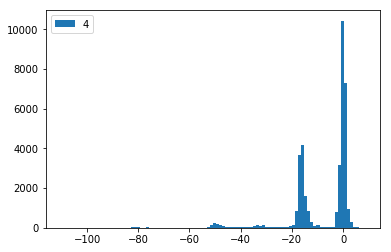

Month :  5
Start and end  2008-05-01 00:00:00 2008-05-28 00:00:00


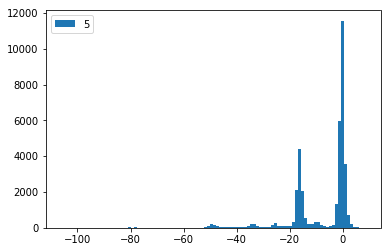

Month :  6
Start and end  2008-06-01 00:00:00 2008-06-28 00:00:00


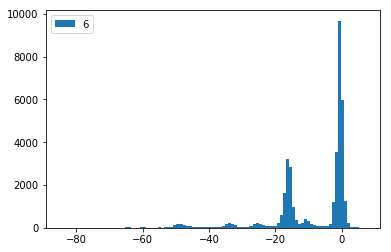

Month :  7
Start and end  2008-07-01 00:00:00 2008-07-28 00:00:00


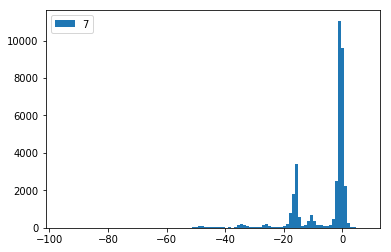

Month :  8
Start and end  2008-08-01 00:00:00 2008-08-28 00:00:00


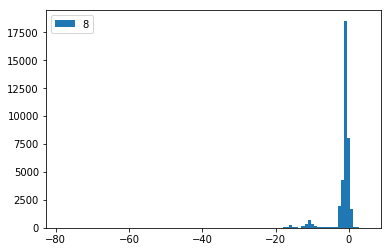

Month :  9
Start and end  2008-09-01 00:00:00 2008-09-28 00:00:00


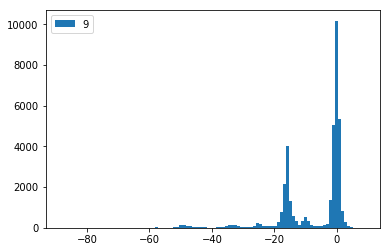

Month :  10
Start and end  2008-10-01 00:00:00 2008-10-28 00:00:00


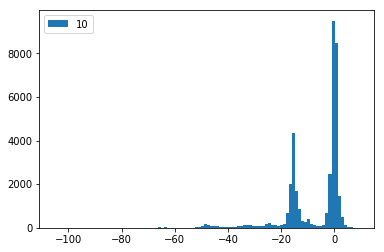

Month :  11
Start and end  2008-11-01 00:00:00 2008-11-28 00:00:00


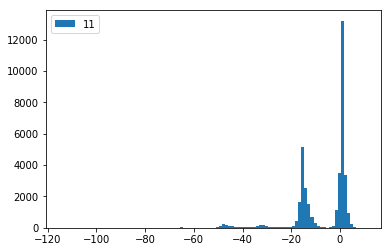

Month :  12
Start and end  2008-12-01 00:00:00 2008-12-28 00:00:00


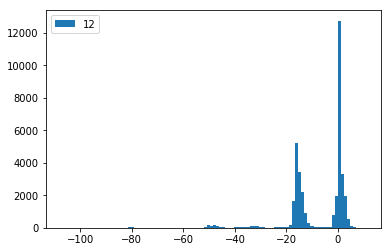

In [38]:
for month in range(1, 13):
    print("Month : ",month)
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    print("Start and end ", start_date, end_date)
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["active_consumption"], label = str(month), bins = 100)
    plt.legend()
    plt.show()

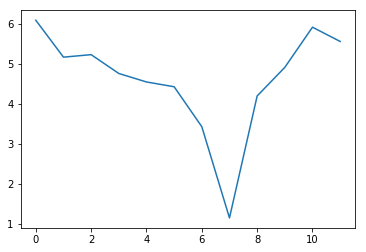

In [39]:
cumul = []
for month in range(1, 13):
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    cumul.append(np.mean(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_intensity"]))

plt.plot(cumul)
plt.show()

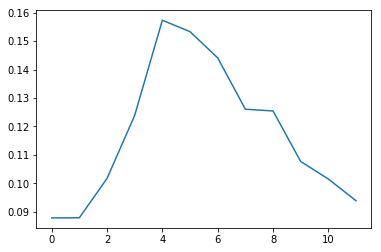

In [40]:
cumul_active = []
for month in range(1, 13):
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    cumul_active.append(np.mean(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_reactive_power"]))

plt.plot(cumul_active)
plt.show()

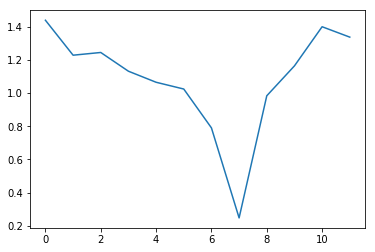

In [41]:
cumul_reactiv = []
for month in range(1, 13):
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    cumul_reactiv.append(np.mean(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_active_power"]))

plt.plot(cumul_reactiv)
plt.show()

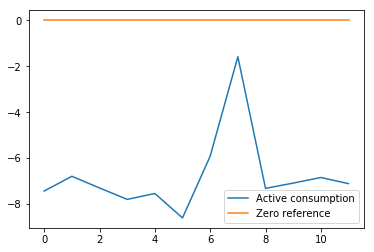

In [47]:
cumul_active_consumption = []
for month in range(1, 13):
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    cumul_active_consumption.append(np.mean(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["active_consumption"]))

plt.plot(cumul_active_consumption, label = "Active consumption")
plt.plot(np.zeros(len(cumul_active_consumption)), label ="Zero reference")
plt.legend()
plt.show()

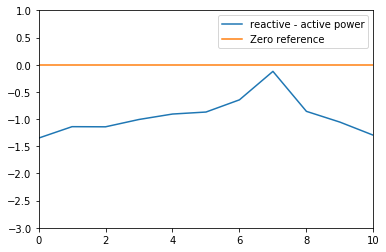

In [49]:
plt.plot(np.array(cumul_active) - np.array(cumul_reactiv),  label = "reactive - active power")
plt.plot(np.zeros(len(cumul_active)), label ="Zero reference")
plt.legend()
plt.axis([0, 10, -3, 1])
plt.show()

# What do we have now 

We still haven't made prediction about the data.

Yet we can already observe some patterns such as relation between active and reactive power variation.

* "Drop" period for both those variables
* Bimodal repartition of the Global informations
* Voltage is a gaussian
* One house's information

So ... the only thing we can analyze with only one house is ... predict its next consumption (hourly, daily...)

What could be our approach
* Normalize SOME data
* Regression maybe?
* LSTM, time series like dataset seems ok for an lstm approach, especially with that much data

# First approach : 
Regression without work on data, to have a baseline
# Problematic :
Let's imagine this is an EDF's problem, EDF produces more electricity than required and want to optimizes its cost, let's predict the Global_X of this client thanks to prior informations

In [148]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.5)

In [149]:
# Split Train / test / label
train_data_X = train
train_data_X = train_data_X.drop(["Global_active_power", "Date", "Time"], axis = 1) # Suppress label, ofc
train_data_Y = train["Global_active_power"] # Global_active_power seems the most important feature, if I understood clearly the definitions
# Lets make it the label we want to predict

test_data_X = test
test_data_X = test_data_X.drop(["Global_active_power", "Date", "Time"], axis = 1) # Suppress label, ofc
test_data_Y = test["Global_active_power"] # Global_active_power seems the most important feature, if I understood clearly the definitions
print(train_data_X.shape, test_data_X.shape, data.shape)

(1024640, 7) (1024640, 7) (2049280, 10)


In [150]:
train_data_X = np.array(train_data_X).reshape((train_data_X.shape[0], 1, train_data_X.shape[1])) # yes, there is a better way but I have a blackout atm
test_data_X = np.array(test_data_X).reshape((test_data_X.shape[0], 1, test_data_X.shape[1])) # yes, there is a better way but I have a blackout atm

In [151]:
train_data_X.shape, test_data_X.shape

((1024640, 1, 7), (1024640, 1, 7))

# Lets begin with an lstm

In [152]:
import keras
from keras.layers import LSTM, Dropout, Dense

In [153]:
layer_1_size = 128
epoch = 3 # Increase it for better result, but on my weak laptop ... 
# Well, tbh, I could modify the data from minutes/hours to hours or day mean 
# We would have significantly less data
# But, there is tons of improvment possible with this subject and I wanted to show you a POC 
# and not a perfect and over optimized solutions, as it was not the purpose here.

batch = 1024 

model = keras.Sequential()
model.add(LSTM(layer_1_size, input_shape = (train_data_X.shape[1], train_data_X.shape[2])))
#model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))
model.compile(loss = "mse", optimizer = "Adam")

history = model.fit(train_data_X, train_data_Y, epochs = epoch, batch_size = batch,\
        validation_data = (test_data_X, test_data_Y), verbose = 1)

Train on 1024640 samples, validate on 1024640 samples
Epoch 1/3
1024640/1024640 [==============================] - 25s 24us/step - loss: 0.0474 - val_loss: 0.0039
Epoch 2/3
1024640/1024640 [==============================] - 22s 21us/step - loss: 0.0034 - val_loss: 0.0028
Epoch 3/3
1024640/1024640 [==============================] - 22s 22us/step - loss: 0.0026 - val_loss: 0.0021


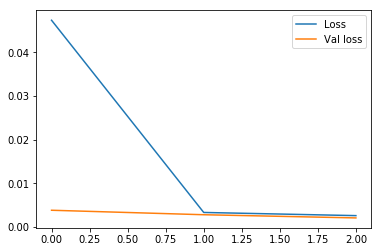

In [154]:
plt.plot(history.history['loss'], label = "Loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.legend()
plt.show()


In [155]:
import sklearn
yhat = model.predict(test_data_X)
test_data_Y = np.array(test_data_Y)

rmse = np.sqrt(sklearn.metrics.mean_squared_error(test_data_Y, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.046


# Quite a good result to begin with

Let's try to normalize data, just to see if we can slightly improve this (let's forget logistic regression, not as interesting as LSTM)

# For baseline : Regression

In [156]:
# Split Train / test / label
train_data_X = train
train_data_X = train_data_X.drop(["Global_active_power", "Date", "Time"], axis = 1) # Suppress label, ofc
train_data_Y = train["Global_active_power"] # Global_active_power seems the most important feature, if I understood clearly the definitions
# Lets make it the label we want to predict

test_data_X = test
test_data_X = test_data_X.drop(["Global_active_power", "Date", "Time"], axis = 1) # Suppress label, ofc
test_data_Y = test["Global_active_power"] # Global_active_power seems the most important feature, if I understood clearly the definitions


In [157]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(train_data_X, train_data_Y)

In [158]:
clf.score(test_data_X, test_data_Y) # Highly not unexpected tbh
# It is actually extremely likely that some variable are correlated with those coeff

1.0

In [160]:
clf.coef_

array([-8.78463968e-14, -8.88178420e-16,  3.33622019e-14,  6.00000000e-01,
        6.00000000e-01,  6.00000000e-01,  6.00000000e-01])